## Exercise 00 : Line chart ##

## Imports ##

In [7]:
import pandas as pd
import sqlite3

## Task #
* установите соединение с базой данных
* выполните запрос, который извлекает datetime из таблицы pageviews, выбирая только пользователей, а не админов
* с помощью Pandas создайте новый DataFrame, в котором визиты считаются и группируются по дате
* с помощью метода Pandas .plot() создайте график:
    * размер шрифта — 8
    * размер фигуры — (15,8)
    * график должен иметь название "Просмотры за день"
    * обратите внимание на вращение подписей оси X (xticks)
* закройте соединение с базой данных

In [8]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [9]:
df = pd.read_sql('SELECT * FROM pageviews WHERE uid LIKE "user%"', conn)
df.head(10)

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
5,19,user_17,2020-04-18 12:06:13.237290
6,20,user_17,2020-04-18 12:06:35.574114
7,21,user_10,2020-04-18 12:19:50.182714
8,24,user_14,2020-04-18 18:14:53.813657
9,25,user_14,2020-04-18 18:20:05.419381


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].apply(lambda x: x.date())
views_per_day = df.groupby('datetime').size().reset_index(name='views_count')
views_per_day.columns = ['date', 'views']
views_per_day.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


<Axes: title={'center': 'Views per day'}, xlabel='date'>

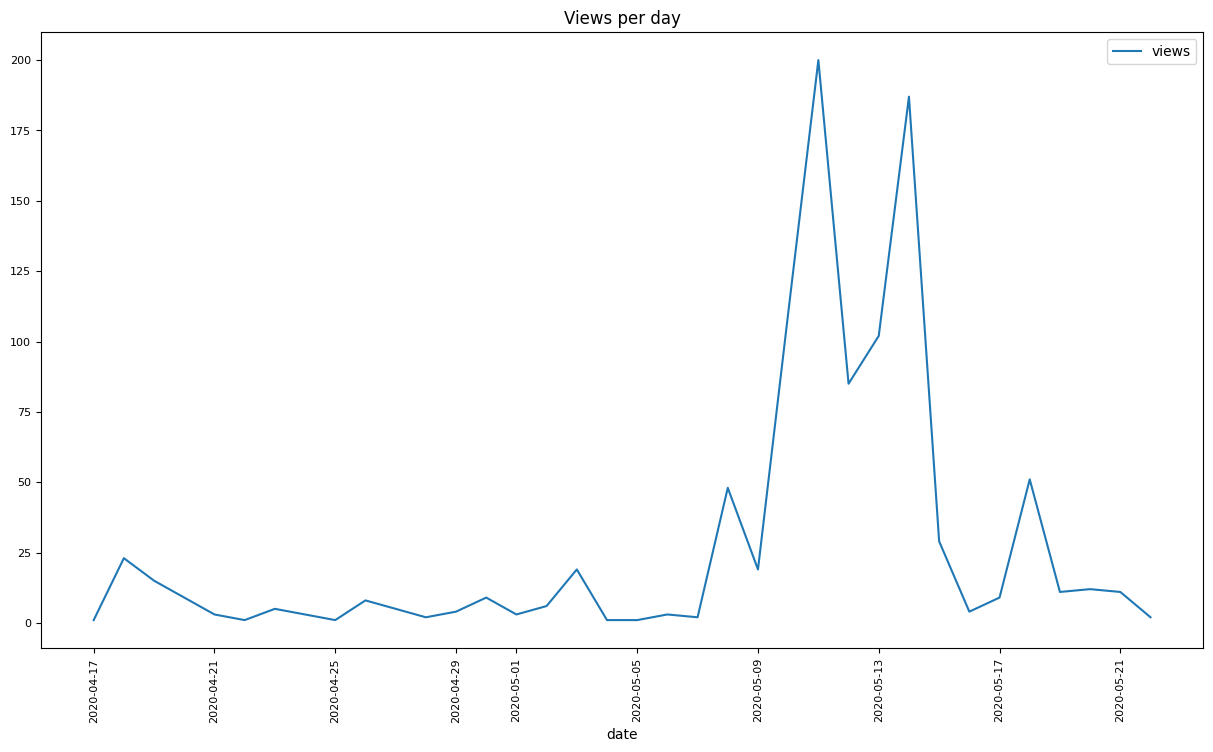

In [ ]:
plt = views_per_day.plot(x='date', y='views', figsize=(15,8), fontsize=8, title='Views per day', rot=90)
plt

In [12]:
conn.close()